[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



(A)Eye color
(B)Height
(C)Number of Siblings
(D)Temperature


**Problem 2**. Analyze the Carbon_West data file using the following code.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

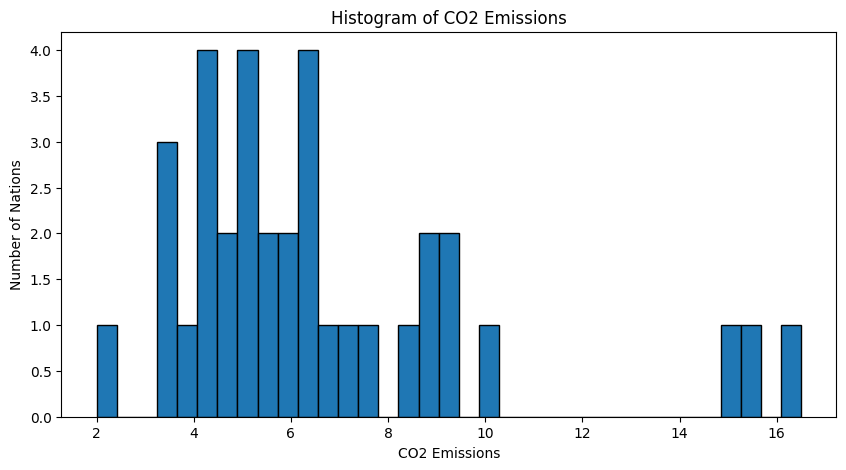

In [79]:
# Construct a histogram
plt.figure(figsize=(10, 5))
plt.hist(carbon_west['CO2'], bins=35, edgecolor='black')
plt.title(f'Histogram of CO2 Emissions')
plt.xlabel("CO2 Emissions")
plt.ylabel('Number of Nations')
plt.show()

Part b. Find the mean, median, and standard deviation.

In [80]:
mean_value = np.mean(carbon_west["CO2"])
median_value = np.median(carbon_west["CO2"])
std_deviation = np.std(carbon_west["CO2"])

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")


Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [81]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")
less_murders = murders.drop(50)

Part a. Find the mean and standard deviation for murders without D.C.

In [82]:
mean_value = np.mean(less_murders['murder'])
std_deviation = np.std(less_murders['murder'])

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_deviation}")

Mean: 4.874
Standard Deviation: 2.560297638947472


Part b. Find the five-number  summary without D.C.

In [83]:
minimum = np.min(less_murders['murder'])
q1 = np.percentile(less_murders['murder'], 25)
median = np.median(less_murders['murder'])
q3 = np.percentile(less_murders['murder'], 75)
maximum = np.max(less_murders['murder'])

print(f"Minimum: {minimum}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"3rd Quartile (Q3): {q3}")
print(f"Maximum: {maximum}")

Minimum: 1.0
1st Quartile (Q1): 2.625
Median (Q2): 4.85
3rd Quartile (Q3): 6.175
Maximum: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [84]:
mean_value = np.mean(murders['murder'])
std_deviation = np.std(murders['murder'])

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_deviation}\n")

minimum = np.min(murders['murder'])
q1 = np.percentile(murders['murder'], 25)
median = np.median(murders['murder'])
q3 = np.percentile(murders['murder'], 75)
maximum = np.max(murders['murder'])

print(f"Minimum: {minimum}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"3rd Quartile (Q3): {q3}")
print(f"Maximum: {maximum}\n")

print("The mean and range are more affected by the outliers")

Mean: 5.252941176470588
Standard Deviation: 3.688687153732127

Minimum: 1.0
1st Quartile (Q1): 2.6500000000000004
Median (Q2): 5.0
3rd Quartile (Q3): 6.45
Maximum: 24.2

The mean and range are more affected by the outliers


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [85]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

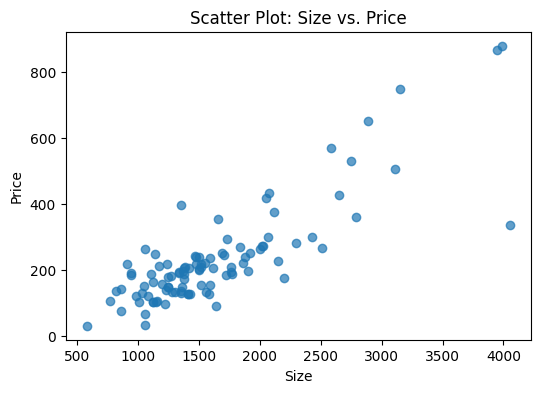

In [86]:
plt.figure(figsize=(6, 4))
plt.scatter(houses['size'], houses['price'], alpha=0.7)
plt.title('Scatter Plot: Size vs. Price')
plt.xlabel('Size')
plt.ylabel('Price')

plt.show()

Part b. Find the correlation between the two variables.

In [87]:
correlation = houses['size'].corr(houses['price'])

print(f'Correlation between size and price: {correlation}')

Correlation between size and price: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

Slope (Coefficient): [0.18989117]
Intercept: [-76.38938211]


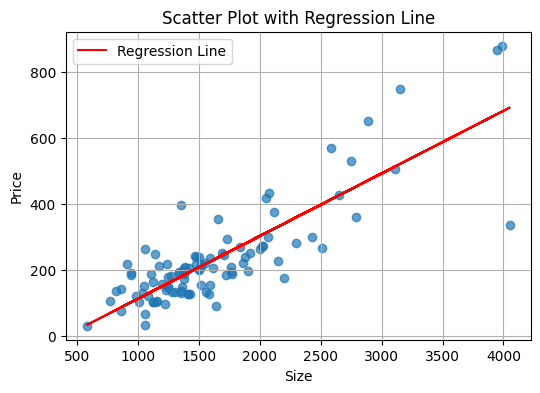

In [88]:
x = houses['size']
y = houses['price']
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Retrieve the coefficient (slope) and intercept of the linear regression
slope = model.coef_[0]
intercept = model.intercept_

# Print the regression results
print(f'Slope (Coefficient): {slope}')
print(f'Intercept: {intercept}')

# Plot the scatterplot
plt.figure(figsize=(6, 4))
plt.scatter(houses['size'], houses['price'], alpha=0.7)

# Plot the regression line
plt.plot(x, model.predict(x), color='red', label='Regression Line')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

<Figure size 800x600 with 0 Axes>

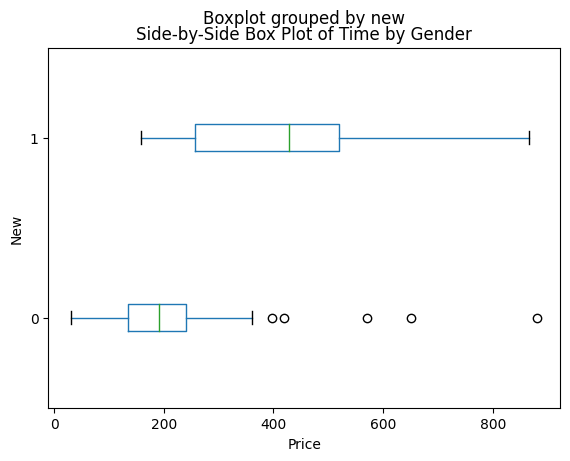

In [89]:
plt.figure(figsize=(8, 6))
houses.boxplot(column='price', by='new', vert=False,grid = False)
plt.title('Side-by-Side Box Plot of Time by Gender')
plt.xlabel('Price')
plt.ylabel('New')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

Size and Price have a positve relationship such that the larger a house is, the higher the price is likely to be. This is shown by the strong positive correlation in the Scatter plot with regresion line. The side by side box plots show that the if a house is new, it will on average cost more than a house that is old, though there are a few outliers showcased in the graph characterizing expensive old houses.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [90]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep='\s+')

In [91]:
pd.crosstab(happy['marital'],happy['happiness'])

happiness,1,2,3
marital,,,
1,432,504,61
2,92,282,103
3,124,409,135
